In [7]:
import rasterio as rio
import matplotlib.pyplot as plt 
import numpy as np
import numpy.matlib
from scipy import interpolate
import statsmodels.api as sm
import scipy.stats as st
import os, sys, pickle, gzip
import datetime
import geopy.distance
import xarray as xr
import xesmf as xe

import cartopy.crs as ccrs
import glob


In [8]:
run ../util/setupConsole_su

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
dirAgData = '/home/edcoffel/drive/MAX-Filer/Research/Climate-01/Personal-F20/edcoffel-F20/data/projects/ag-land-climate'
dirEra5 = '/home/edcoffel/drive/MAX-Filer/Research/Climate-02/Data-02-edcoffel-F20/ERA5'
dirEra5 = '/home/edcoffel/drive/MAX-Filer/Research/Climate-02/Data-02-edcoffel-F20/CMIP6'

# dirAgData = '/dartfs-hpc/rc/lab/C/CMIG/ecoffel/data/projects/ag-land-climate'
# dirEra5 = '/dartfs-hpc/rc/lab/C/CMIG/ERA5'


In [ ]:
cmip6_models = ['bcc-csm2-mr', 'bcc-esm1', 'canesm5', \
                'kace-1-0-g', 'ipsl-cm6a-lr', 'miroc6', \
                'mri-esm2-0', 'noresm2-lm']

In [14]:
# calc era5 quantiles
# ds = xr.open_mfdataset('%s/daily/evaporation_*.nc'%dirEra5, combine='by_coords', parallel=False)
ds = xr.open_mfdataset('%s/%s/%s/%s/%s/*_day_*.nc'%(dirCmip6, model, 'r1i1p1f1', 'historical', 'tasmax'), concat_dim='time')

In [19]:
# ds_quantile = ds.chunk({'latitude':10, 'longitude':10, 'time': None}).quantile(q=np.arange(0, 1.01, .01), dim='time')
ds_quantile = ds.chunk({'time':-1}).quantile(q=np.arange(0, 1.01, .01), dim='time')

In [ ]:
ds_quantile.e.to_netcdf('era5_evaporation_quantiles.nc', engine='netcdf4')

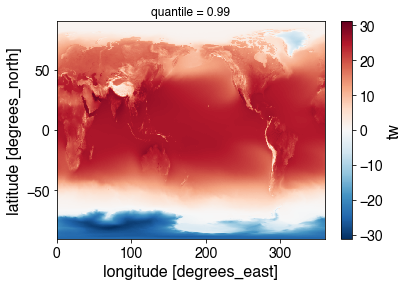

In [7]:
d.tw[5,:,:].plot()